---

# Behavioral Cloning Notebook

---
[![Udacity - Self-Driving Car NanoDegree](https://s3.amazonaws.com/udacity-sdc/github/shield-carnd.svg)](http://www.udacity.com/drive)

## Overview

This notebook contains project files for the Behavioral Cloning Project.

In this project, I use my knowledge on deep neural networks and convolutional neural networks to clone driving behaviors. I   train, validate and test a model using Keras. The model will output a steering angles for an autonomous vehicle given images collected from the car.

Udacity has provided a car simulator where you can steer a car around a track for data collection. The image data and steering angles are used to train a neural network and then a trained model is used to drive the car autonomously around the track.


## Import Packages

In [1]:
import csv
from PIL import Image
import cv2
import numpy as np
import h5py
import os
from random import shuffle
import sklearn

## Read and store lines from driving log csv file

In [2]:
samples = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    # if we added headers to row 1 we better skip this line
    #iterlines = iter(reader)
    #next(iterlines)
    for line in reader:
        samples.append(line)

## Image Processing

In [3]:
def gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def clahe_normalise(image):
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
    return clahe.apply(image)

def process_image(image):
    # do some pre processing on the image
    # TODO: Continue experimenting with colour, brightness adjustments
    #image = gray_scale(image)
    #image = clahe_normalise(image)
    return image

# TODO: more testing with ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
# https://keras.io/preprocessing/image/
#train_datagen = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
#    rotation_range=0,
#    width_shift_range=0.0,
#    height_shift_range=0.0,
#    horizontal_flip=True)

## Data visualisation

['IMG/center_2016_12_01_13_46_16_663.jpg', ' IMG/left_2016_12_01_13_46_16_663.jpg', ' IMG/right_2016_12_01_13_46_16_663.jpg', '0', '0.9855326', '0', '30.38474']
Sample Information
Centre Image Location:  IMG/center_2016_12_01_13_46_16_663.jpg
Centre Image Location:   IMG/left_2016_12_01_13_46_16_663.jpg
Centre Image Location:   IMG/right_2016_12_01_13_46_16_663.jpg
Steering Centre:  0
Throttle:  0.9855326


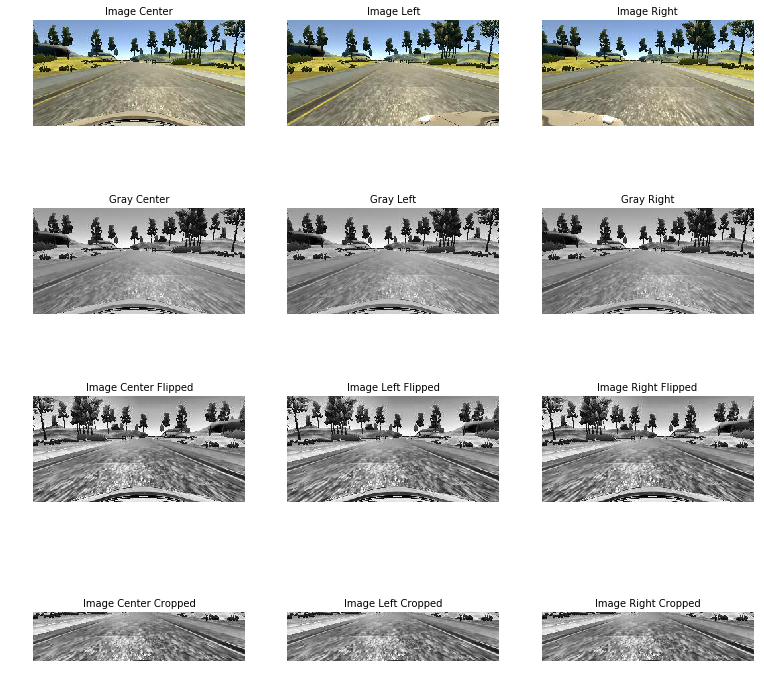

In [4]:
import random
import matplotlib.pyplot as plt
from PIL import Image

index = random.randint(0, len(samples))
sample = samples[index]
print(sample)

print ("Sample Information")
print("Centre Image Location: ", sample[0])
print("Centre Image Location: ", sample[1])
print("Centre Image Location: ", sample[2])
print("Steering Centre: ", sample[3])
print ("Throttle: ", sample[4])


path = "data/IMG/"
# RGB
img_center  = np.asarray(Image.open(path+os.path.basename(sample[0])))
img_left    = np.asarray(Image.open(path+os.path.basename(sample[1])))
img_right   = np.asarray(Image.open(path+os.path.basename(sample[2])))

# Gray
gray_img_center = gray_scale(img_center)
gray_img_left = gray_scale(img_center)
gray_img_right = gray_scale(img_center)

# Flipped
img_center_flipped = cv2.flip(gray_img_center,1)
img_left_flipped = cv2.flip(gray_img_center,1)
img_right_flipped = cv2.flip(gray_img_center,1)

# Normalised
img_center_flipped_normalised = clahe_normalise(img_center_flipped)
img_left_flipped_normalised = clahe_normalise(img_left_flipped)
img_right_flipped_normalised = clahe_normalise(img_right_flipped)

# Crop
img_center_cropped = img_center_flipped_normalised[65:160-22,0:320]
img_left_cropped = img_left_flipped_normalised[65:160-22,0:320]
img_right_cropped = img_right_flipped_normalised[65:160-22,0:320]


steering_center = float(sample[3]) # steering measurement for centre image
correction = 0.1 # steering offset for left and right images, tune this parameter
steering_left = steering_center + correction
steering_right = steering_center - correction

# And print the results
# RGB
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.imshow(img_center)
plt.axis('off')
plt.title('Image Center', fontsize=10)
plt.subplot(4,3,2)
plt.imshow(img_left)
plt.axis('off')
plt.title('Image Left', fontsize=10)
plt.subplot(4,3,3)
plt.imshow(img_right)
plt.axis('off')
plt.title('Image Right', fontsize=10)
### Gray
plt.subplot(4,3,4)
plt.imshow(gray_img_center, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray Center', fontsize=10)
plt.subplot(4,3,5)
plt.imshow(gray_img_left, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray Left', fontsize=10)
plt.subplot(4,3,6)
plt.imshow(gray_img_right, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gray Right', fontsize=10)

### Flipped Images
plt.subplot(4,3,7)
plt.imshow(img_center_flipped_normalised, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Center Flipped', fontsize=10)
plt.subplot(4,3,8)
plt.imshow(img_left_flipped_normalised, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Left Flipped', fontsize=10)
plt.subplot(4,3,9)
plt.imshow(img_right_flipped_normalised, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Right Flipped', fontsize=10)

### Normalised Images
plt.subplot(4,3,10)
plt.imshow(img_center_flipped_normalised, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Center Flipped', fontsize=10)
plt.subplot(4,3,11)
plt.imshow(img_left_flipped_normalised, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Left Flipped', fontsize=10)
plt.subplot(4,3,12)
plt.imshow(img_right_flipped_normalised, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Right Flipped', fontsize=10)

### Normalised Images
plt.subplot(4,3,10)
plt.imshow(img_center_cropped, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Center Cropped', fontsize=10)
plt.subplot(4,3,11)
plt.imshow(img_left_cropped, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Left Cropped', fontsize=10)
plt.subplot(4,3,12)
plt.imshow(img_right_cropped, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Image Right Cropped', fontsize=10)

plt.subplots_adjust(wspace=0.2, hspace=0.2, top=0.5, bottom=0, left=0, right=0.5)
plt.savefig('plots/data_visualisation.png')
plt.show()

## Take a validation set

In [5]:
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)


## Define Data Generator 
Refer to https://medium.com/@fromtheast/implement-fit-generator-in-keras-61aa2786ce98 for a good tutorial

In [6]:
from numpy import newaxis
def generator(samples, batch_size=32):
    # Create empty arrays to contain batch of features and labels
    num_samples = len(samples)

    while True:
        shuffle(samples) 
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            batch_features = [] 
            batch_labels = [] 

            for batch_sample in batch_samples:
                path = "data/IMG/"
                img_center  = process_image(np.asarray(Image.open(path+os.path.basename(batch_sample[0]))))
                img_left    = process_image(np.asarray(Image.open(path+os.path.basename(batch_sample[1]))))
                img_right   = process_image(np.asarray(Image.open(path+os.path.basename(batch_sample[2]))))

                #We now want to create adjusted steering measurement for the side camera images
                steering_center = float(batch_sample[3]) # steering measurement for centre image
                correction = 0.1 # steering offset for left and right images, tune this parameter
                steering_left = steering_center + correction
                steering_right = steering_center - correction
                
                # TODO: Add throttle information
                batch_features.extend([img_center, img_left, img_right, cv2.flip(img_center,1), cv2.flip(img_left,1), cv2.flip(img_right,1)])
                batch_labels.extend([steering_center, steering_left, steering_right, steering_center*-1.0, steering_left*-1.0, steering_right*-1.0])

            X_train = np.array(batch_features)
            # X_train = X_train[..., newaxis] # if converting to gray scale and normalising, may need to add another axis
            # Do some image processing on the data
            #train_datagen.fit(X_train)
            y_train = np.array(batch_labels)
            yield sklearn.utils.shuffle(X_train, y_train) # once we've got our processed batch send them off



## Build Model Architecture

In [7]:
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

# Imports to  build the model Architecture
import matplotlib.pyplot as plt
from keras.models import Model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D
from keras.layers.core import Dropout
from keras.layers.noise import GaussianDropout
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Cropping2D

# In the architecture we add a crop layer
crop_top = 65
crop_bottom = 22
# The input image dimensions
input_height = 160
input_width = 320
new_height = input_height - crop_bottom - crop_top

# Build the model architecture
# Based on http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf
model = Sequential()
model.add(Cropping2D(cropping=((crop_top,crop_bottom),(0,0)), input_shape=(input_height,input_width, 3)))
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(new_height,input_width,3)))
model.add(Conv2D(24,kernel_size=5,strides=(2, 2),activation='relu'))
model.add(Conv2D(36,kernel_size=5,strides=(2, 2),activation='relu'))
model.add(Conv2D(48,kernel_size=5,strides=(2, 2),activation='relu'))
model.add(Conv2D(64,kernel_size=3,strides=(1, 1),activation='relu'))
model.add(Conv2D(64,kernel_size=3,strides=(1, 1),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1164))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
print("model summary: ", model.summary())


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 73, 320, 3)        0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 73, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 33, 64)         36928     
__________

## Train the  model

In [8]:
batch_size = 100
# Info: https://medium.com/@fromtheast/implement-fit-generator-in-keras-61aa2786ce98
history_object = model.fit_generator(
    train_generator, steps_per_epoch=len(train_samples)/batch_size, 
    validation_data = validation_generator, validation_steps=len(validation_samples)/batch_size,
    epochs=5, verbose=1)

Epoch 1/5
242/241 [==============================] - 263s - loss: 0.0402 - val_loss: 0.0275
Epoch 2/5
242/241 [==============================] - 252s - loss: 0.0275 - val_loss: 0.0252
Epoch 3/5
242/241 [==============================] - 244s - loss: 0.0241 - val_loss: 0.0225
Epoch 4/5
242/241 [==============================] - 232s - loss: 0.0216 - val_loss: 0.0265
Epoch 5/5
242/241 [==============================] - 231s - loss: 0.0210 - val_loss: 0.0207


In [9]:
model.save('model.h5')

dict_keys(['val_loss', 'loss'])


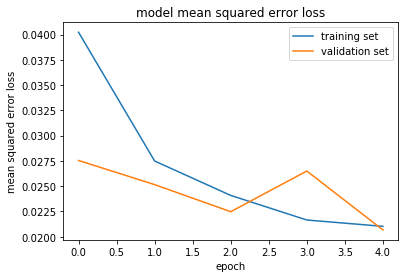

In [10]:
### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()